In [1]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import joblib

In [2]:
# Read the CSV
df = pd.read_csv("../cleaned_data/cleaned_house_crime_school.csv")
df

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CrimeRate,NearbySchools
0,Abbotsford,85 Turner St,2,h,1480000.0,2016-12-03,2.5,3067,1,1,202,0,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019,157,2
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2016-02-04,2.5,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,157,2
2,Abbotsford,5 Charles St,3,h,1465000.0,2017-03-04,2.5,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,157,2
3,Abbotsford,40 Federation La,3,h,850000.0,2017-03-04,2.5,3067,2,1,94,0,0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019,157,2
4,Abbotsford,55a Park St,4,h,1600000.0,2016-06-04,2.5,3067,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019,157,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16035,Yarraville,78 Bayview Rd,3,h,1101000.0,2018-02-24,6.3,3013,1,0,288,0,0,Maribyrnong City Council,-37.8110,144.8852,Western Metropolitan,6543,136,5
16036,Yarraville,13 Burns St,4,h,1480000.0,2018-02-24,6.3,3013,1,3,593,0,0,Maribyrnong City Council,-37.8105,144.8847,Western Metropolitan,6543,136,5
16037,Yarraville,29A Murray St,2,h,888000.0,2018-02-24,6.3,3013,2,1,98,104,2018,Maribyrnong City Council,-37.8155,144.8883,Western Metropolitan,6543,136,5
16038,Yarraville,147A Severn St,2,t,705000.0,2018-02-24,6.3,3013,1,2,220,120,2000,Maribyrnong City Council,-37.8229,144.8786,Western Metropolitan,6543,136,5


In [3]:
df=df[df["YearBuilt"]!=0]
df=df[df["BuildingArea"]!=0]
df

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CrimeRate,NearbySchools
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2016-02-04,2.5,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,157,2
2,Abbotsford,5 Charles St,3,h,1465000.0,2017-03-04,2.5,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,157,2
4,Abbotsford,55a Park St,4,h,1600000.0,2016-06-04,2.5,3067,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019,157,2
6,Abbotsford,124 Yarra St,3,h,1876000.0,2016-05-07,2.5,3067,2,0,245,210,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019,157,2
7,Abbotsford,98 Charles St,2,h,1636000.0,2016-10-08,2.5,3067,1,2,256,107,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019,157,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16032,Wollert,27 Birchmore Rd,3,h,500000.0,2018-02-24,25.5,3750,2,2,383,118,2016,Whittlesea City Council,-37.6194,145.0395,Northern Metropolitan,2940,107,3
16034,Wollert,35 Kingscote Wy,3,h,570000.0,2018-02-24,25.5,3750,2,2,404,158,2012,Whittlesea City Council,-37.6103,145.0339,Northern Metropolitan,2940,107,3
16037,Yarraville,29A Murray St,2,h,888000.0,2018-02-24,6.3,3013,2,1,98,104,2018,Maribyrnong City Council,-37.8155,144.8883,Western Metropolitan,6543,136,5
16038,Yarraville,147A Severn St,2,t,705000.0,2018-02-24,6.3,3013,1,2,220,120,2000,Maribyrnong City Council,-37.8229,144.8786,Western Metropolitan,6543,136,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7965 entries, 1 to 16039
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         7965 non-null   object 
 1   Address        7965 non-null   object 
 2   Rooms          7965 non-null   int64  
 3   Type           7965 non-null   object 
 4   Price          7965 non-null   float64
 5   Date           7965 non-null   object 
 6   Distance       7965 non-null   float64
 7   Postcode       7965 non-null   int64  
 8   Bathroom       7965 non-null   int64  
 9   Car            7965 non-null   int64  
 10  Landsize       7965 non-null   int64  
 11  BuildingArea   7965 non-null   int64  
 12  YearBuilt      7965 non-null   int64  
 13  CouncilArea    7965 non-null   object 
 14  Lattitude      7965 non-null   float64
 15  Longtitude     7965 non-null   float64
 16  Regionname     7965 non-null   object 
 17  Propertycount  7965 non-null   int64  
 18  CrimeRa

In [5]:
df.corr().sort_values("Price", ascending=False).drop(["Price", "Lattitude", "Longtitude", "Postcode"],axis="rows").drop(["Rooms", "Distance", "Postcode", "Bathroom", "Car", "BuildingArea", "Landsize", "YearBuilt", "Propertycount", "NearbySchools", "Lattitude", "Longtitude", "CrimeRate"], axis="columns")

,Price
BuildingArea,0.476558
Bathroom,0.429766
Rooms,0.412819
Car,0.148983
Landsize,0.015607
Propertycount,-0.045556
NearbySchools,-0.245562
YearBuilt,-0.306949
CrimeRate,-0.310179
Distance,-0.321379


# Select features (columns)

In [6]:
# Set features to be used as X values.
X = df.drop(["Price",
             "Suburb",
             "Date",
             "Address",
             "Type",
             "CouncilArea",
             "Lattitude",
             "Longtitude",
             "Regionname",
              "Postcode"], axis = "columns")
y = df["Price"]
print(X.shape, y.shape)

(7965, 10) (7965,)


In [7]:
X

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,CrimeRate,NearbySchools
1,2,2.5,1,0,156,79,1900,4019,157,2
2,3,2.5,2,0,134,150,1900,4019,157,2
4,4,2.5,1,2,120,142,2014,4019,157,2
6,3,2.5,2,0,245,210,1910,4019,157,2
7,2,2.5,1,2,256,107,1890,4019,157,2
...,...,...,...,...,...,...,...,...,...,...
16032,3,25.5,2,2,383,118,2016,2940,107,3
16034,3,25.5,2,2,404,158,2012,2940,107,3
16037,2,6.3,2,1,98,104,2018,6543,136,5
16038,2,6.3,1,2,220,120,2000,6543,136,5


In [8]:
selected_df=df[["Price","Rooms","Bathroom", "Car", "Landsize", "BuildingArea", "Propertycount", "NearbySchools","Distance", "YearBuilt", "CrimeRate"]]

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

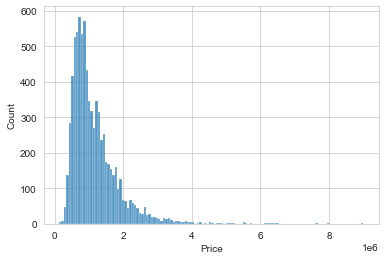

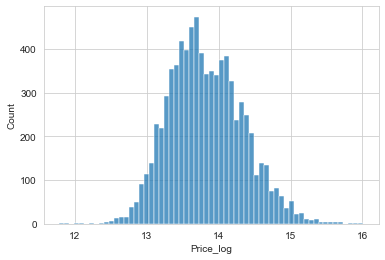

In [10]:
x = df.Price
sns.set_style('whitegrid')
sns.histplot(x)
plt.show()

df['Price_log'] = np.log(df.Price)
x = df.Price_log
sns.histplot(x)
plt.show()


# Correlations

<AxesSubplot:>

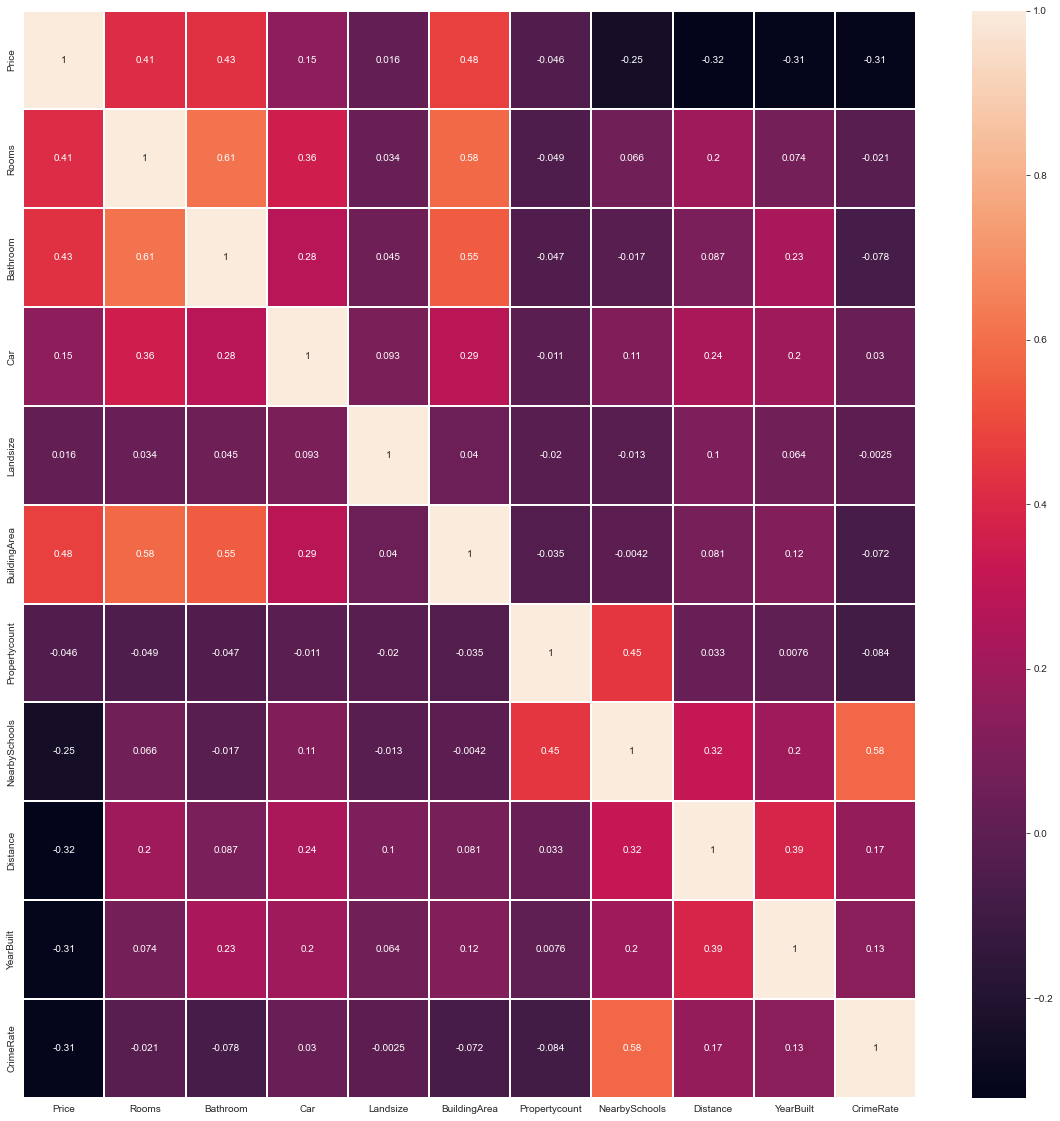

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(selected_df.corr(), annot=True, linewidths=0.01)

The correlation measure used here is Pearson’s correlation.
In our case the lighter the square the stronger the correlation between two variables.

Features such as Propertcount, Rooms and Carpark were all positively correlated with sale price as one might expect. 

In [12]:
# GET housing stats
total_houses = len(df)
max_value = df["Price"].describe()["max"]
min_value = df["Price"].describe()["min"]
print(f"Total houses: {total_houses}")
print(f"Highest price: {max_value}")
print(f"Lowest price: {min_value}")

Total houses: 7965
Highest price: 9000000.0
Lowest price: 131000.0


# Split the data into test and train data using `train_test_split` with test size of 33%

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)
X_train

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,CrimeRate,NearbySchools
12747,3,16.5,2,2,228,135,2017,2474,173,1
188,3,11.1,2,3,555,130,1960,5132,155,3
3188,4,11.2,3,2,412,254,1930,8801,240,6
11141,4,15.5,2,2,779,185,1980,6202,115,3
2429,4,13.0,1,2,630,130,1960,8870,396,10
...,...,...,...,...,...,...,...,...,...,...
10377,2,13.1,1,2,177,84,2013,5070,201,6
10751,4,12.1,2,2,538,144,1970,10175,494,9
1578,3,9.3,2,2,357,144,1935,5051,221,4
15222,4,16.1,2,4,920,151,1995,8524,362,11


In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 42, test_size = 7964)
X_train2

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,CrimeRate,NearbySchools
14543,3,31.7,2,1,402,119,2010,14092,200,14


# Pre-processing

In [15]:
# Scale the data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model using RandomForestRegression

In [16]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_scaled, y_train)

training_score = regressor.score(X_train_scaled, y_train)
base_accuracy = regressor.score(X_test_scaled, y_test)

print(f"RandomForestregressor training Data Score: {training_score}")
print(f"RandomForestregressor testing Data Score: {base_accuracy}")

RandomForestregressor training Data Score: 0.96573126823253
RandomForestregressor testing Data Score: 0.7457560213481887


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

# Parameters: n_estimators=600, max_features= Auto, max_depth= None

In [17]:
# Create the GridSearchCV model
param_grid = {"n_estimators": [800, 1600],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth": [17, 18, None]}

grid = GridSearchCV(regressor, param_grid, error_score = "raise", verbose = 3, cv = 5, n_jobs = -1)

In [18]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [17, 18, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [800, 1600]},
             verbose=3)

In [19]:
print(f"Best grid params: {grid.best_params_}")
print(f"Best grid score: {grid.best_score_}")

Best grid params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1600}
Best grid score: 0.7707345445562793


# Train Tuned Model

In [20]:
# Tuned parameters
max_features = grid.best_params_["max_features"]
n_estimators = grid.best_params_["n_estimators"]
max_depth = grid.best_params_["max_depth"]

# Tuned model
tuned_model = RandomForestRegressor(max_features = max_features, 
                                     n_estimators = n_estimators,
                                     max_depth = max_depth,
                                     random_state = 42)
tuned_model.fit(X_train, y_train)

tuned_model_score = tuned_model.score(X_train, y_train)
tuned_accuracy = tuned_model.score(X_test, y_test)

print(f"Training Data Score: {tuned_model_score}")
print(f"Testing Data Score: {tuned_accuracy}")

Training Data Score: 0.9697534880262157
Testing Data Score: 0.7601770621311216


In [21]:
# Make predictions with the hypertuned model
predictions = tuned_model.predict(X_test)

prediction_actual = {"Actual": y_test,
                     "Prediction": predictions}

prediction_df = pd.DataFrame(prediction_actual)
prediction_df = prediction_df.set_index("Actual").reset_index()
prediction_df

,Actual,Prediction
0,1835000.0,1.740374e+06
1,1836000.0,1.608161e+06
2,1650000.0,1.175278e+06
3,1650000.0,1.612360e+06
4,1930000.0,1.695559e+06
...,...,...
2624,1550000.0,9.030535e+05
2625,1460000.0,1.220627e+06
2626,1055000.0,1.214395e+06
2627,1435000.0,1.292504e+06


In [22]:
# Make predictions with the hypertuned model
predictions = tuned_model.predict(X_test2)
classifications = y_test2.unique().tolist()

prediction_actual = {"Actual": y_test2,
                     "Prediction": predictions}

full_prediction_df = pd.DataFrame(prediction_actual)
full_prediction_df = full_prediction_df.set_index("Actual").reset_index()
full_prediction_df

,Actual,Prediction
0,1835000.0,1.740374e+06
1,1836000.0,1.608161e+06
2,1650000.0,1.175278e+06
3,1650000.0,1.612360e+06
4,1930000.0,1.695559e+06
...,...,...
7959,985000.0,9.900234e+05
7960,515000.0,5.554439e+05
7961,730000.0,7.580452e+05
7962,1577500.0,1.514458e+06


In [23]:
full_prediction_df.to_csv("../output/price_prediction_df.csv", index = False, encoding = "utf-8")

In [24]:
evaluations = {"": ["Base Model", "Tuned Model"],
               "Accuracy": [f"%s" % round(base_accuracy, 3), f"%s" % round(tuned_accuracy, 3)]}

evaluations_df = pd.DataFrame(evaluations)
evaluations_df = evaluations_df.set_index("")

evaluations_df.to_csv("../evaluations/random_forest_eval.csv")
evaluations_df

,Accuracy
,
Base Model,0.746
Tuned Model,0.76


# Save the model

In [25]:
# filename = "../models/random_forest.sav"
# joblib.dump(tuned_model, filename)

['../models/random_forest.sav']